In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

import os
import gezi, melt
from deepiu.util import ids2text
from libgezi import utf82gbk, gbk2utf8

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image

tensorflow_version: 1.2.0-rc0


Warning, no conf.py in current path use util conf


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
image_path = os.path.join(image_dir, image_file)

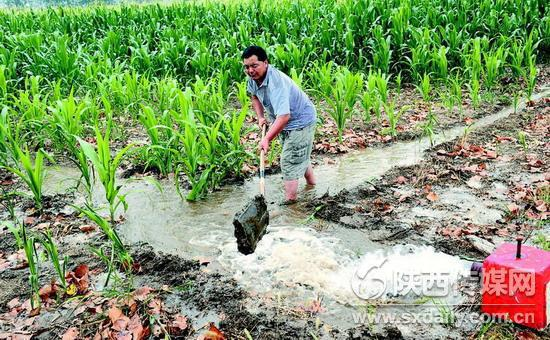

In [4]:
Image(image_path)

In [5]:
image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'
image_model = melt.image.ImageModel(image_model_checkpoint_path, model_name='InceptionResnetV2')

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt


In [6]:
feature = image_model.gen_feature(image_path)

In [7]:
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model/showandtell/'
predictor = melt.TextPredictor(model_dir)

INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell/model.ckpt-51.9-213000


restore meta grpah and model ok /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell/model.ckpt-51.9-213000


In [8]:
texts, scores = predictor.predict(feature)
print(texts, scores)

[[[722  16  11 ...,   9   9   9]
  [722  16  11 ...,   9   9   9]
  [722  16  11 ...,   9   9   9]
  ..., 
  [722  16  11 ...,   9   9   9]
  [722  16  11 ...,   9   9   9]
  [722  16  11 ...,   9   9   9]]] [[ 0.51512283  0.50784415  0.50669074  0.5046944   0.50414556  0.49322373
   0.48957124  0.48165673  0.45785385  0.44628558]]


In [9]:
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
ids2text.init(vocab_path)

ENCODE_UNK 0


In [10]:
texts = texts[0]
scores = scores[0]
for text, score in zip(texts, scores):
    print(gbk2utf8(ids2text.ids2text(text)), score)
    print(gbk2utf8(ids2text.translate(text)), score)

田地/里/有/一/个/双手/拿/着/工具/的/男人/在/干活/</S> 0.515123
田地里有一个双手拿着工具的男人在干活 0.515123
田地/里/有/一/个/穿/着/深色/上衣/的/男人/在/干活/</S> 0.507844
田地里有一个穿着深色上衣的男人在干活 0.507844
田地/里/有/一/个/穿/着/短袖/的/男人/在/干活/</S> 0.506691
田地里有一个穿着短袖的男人在干活 0.506691
田地/里/有/一/个/右手/拿/着/工具/的/男人/在/干活/</S> 0.504694
田地里有一个右手拿着工具的男人在干活 0.504694
田地/里/有/一/个/穿/着/蓝色/上衣/的/男人/在/干活/</S> 0.504146
田地里有一个穿着蓝色上衣的男人在干活 0.504146
田地/里/有/一/个/弯/着/腰/的/男人/在/干活/</S> 0.493224
田地里有一个弯着腰的男人在干活 0.493224
田地/里/有/一/个/双手/拿/着/锄头/的/男人/在/干活/</S> 0.489571
田地里有一个双手拿着锄头的男人在干活 0.489571
田地/里/有/一/个/双手/拿/着/东西/的/男人/在/干活/</S> 0.481657
田地里有一个双手拿着东西的男人在干活 0.481657
田地/里/有/一/个/双手/拿/着/工具/的/男人/在/给/植物/浇水/</S> 0.457854
田地里有一个双手拿着工具的男人在给植物浇水 0.457854
田地/里/有/一/个/双手/拿/着/工具/的/男人/在/给/一/个/弯/着/腰/的/男人/浇水/</S> 0.446286
田地里有一个双手拿着工具的男人在给一个弯着腰的男人浇水 0.446286


In [19]:
#TODO mutltiple graph

# g = tf.Graph()
# with g.as_default():
#   #image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'
#   #image_model2 = melt.image.ImageModel(image_model_checkpoint_path, model_name='InceptionResnetV2')
#   feature = image_model.gen_feature(image_path)

#   model_dir2 = '/home/gezi/new/temp/image-caption/ai-challenger/model/showandtell/epoch/model.cpkt-1-4101'
#   predictor2 = melt.TextPredictor(model_dir2) #notice by default will use ne tf.Session
#   texts, scores = predictor.predict(feature)
#   texts = texts[0]
#   scores = scores[0]
#   for text, score in zip(texts, scores):
#     print(gbk2utf8(ids2text.ids2text(text)), score)
#     print(gbk2utf8(ids2text.translate(text)), score)

INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell/epoch/model.cpkt-1-4101


restore meta grpah and model ok /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell/epoch/model.cpkt-1-4101


ValueError: Fetch argument <tf.Tensor 'show_and_tell/main/Gather:0' shape=(?, 10, 102) dtype=int32> cannot be interpreted as a Tensor. (Tensor Tensor("show_and_tell/main/Gather:0", shape=(?, 10, 102), dtype=int32) is not an element of this graph.)